#  GARCH Model

In this Notebook, we will focus on the GARCH model.
Part of the notebook comes from sources: \
https://github.com/ritvikmath/Time-Series-Analysis/tree/master  \
https://arch.readthedocs.io/en/latest/univariate/introduction.html

# Activity 1 , GARCH simulation
Generate a time series using GARCH model and save the data for your friends to solve in Activity 2. The new package we need today is 'arch' please install it before you go ahead. Altough the package is called arch, it is actually contains GARCH. 

In [51]:

from random import gauss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Remember in the lecture we introduced GARCH model, for example GARCH(2,2) here is in the format of:

(1)
$$
\sigma_{t}^2 = \omega + \alpha_1 \varepsilon_{t-1}^2 + \alpha_2 \varepsilon_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2    
$$
(2)
$$
\varepsilon_t = \sigma_{t} z_t 
$$

$$
z_t \sim \mathcal{N}(0,1)
$$


where epsilon_t is the residual of a mean model and sigma is the standard deviation of the residual.\
If we substitue equation (1) into (2), we can write the GARCH model in the format of prediction of time series epsilon_t (instead of volitility sigma) 

(3)
$$
\varepsilon_t = z_t \sqrt{\omega + \alpha_1 \varepsilon_{t-1}^2 + \alpha_2 \varepsilon_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

Now let's generate a time series of epsilon_t , set the initial terms epsilon_0 and epsilon_1 as N(0,1) and sigma_0, sigma_1 as 1.

$$
\varepsilon_0, \varepsilon_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

In [52]:
# Q 1.1   Set the initial value and the model parameter to generate a GARCH (2,2) model. 
# You can generate other models like GARCH (1,1) by adjusting the parameters and equations

# Set the initial values and the model parameters
# Generating 500 steps of data
n = 500

# Set your model Parameters
omega = 0.5
alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.4
beta_2 = 0.2


# initial values of the time series, epsilon_0 ，epsilon_1，sigma_0, sigma_1 
series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]


# Generate the time series using equation (3), save the time series(psilon_t ) and volitility(sigma_t) in the lists series[] and vols[].
for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_series = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_series)

Text(0.5, 1.0, 'Simulated Series and Volatility')

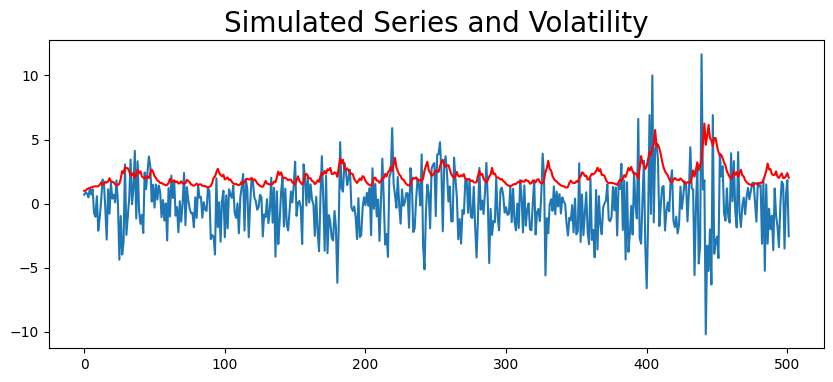

In [53]:
# Q 1.2 plot the time series and volatility together in a graph, and check the simulation restuls.
# Are there any volatility clustering?

plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Simulated Series and Volatility', fontsize=20)

In [ ]:
# Q1.3 Play with the model parameters and observe the changes in the outcome.
# (optional) Save the time series data and pass it to your friends to model in Activity2. 

# Transform the lists to dataframe and save the dataframe
df = pd.DataFrame({'values' : series, 'volatility' : vols})
df.to_csv('GARCH_simulation.csv',index=False)

# Activity 2 , Garch modelling
Get the data file from your firend, or use your own simulation generated in Q1, or download sample (GARCH_simulation.csv) from BB, do GARCH simulation on the data

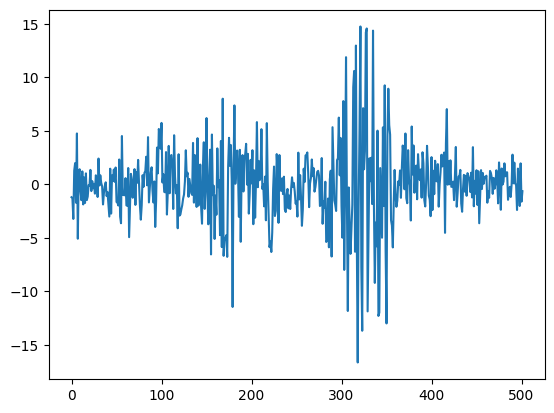

In [63]:
# Q2.1 Load the data, plot it out and check if the time series has volatility clustering 
df = pd.read_csv('GARCH_simulation.csv')
plt.plot(df['values'])

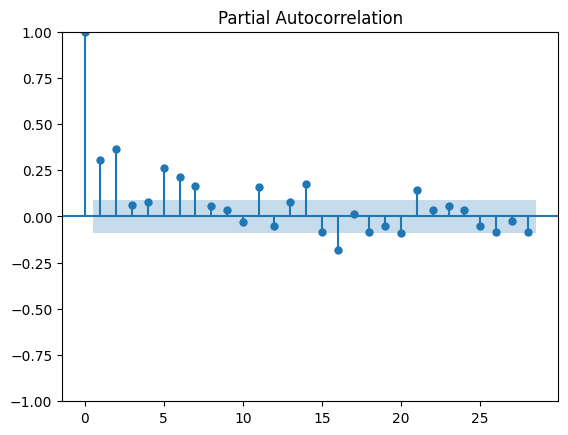

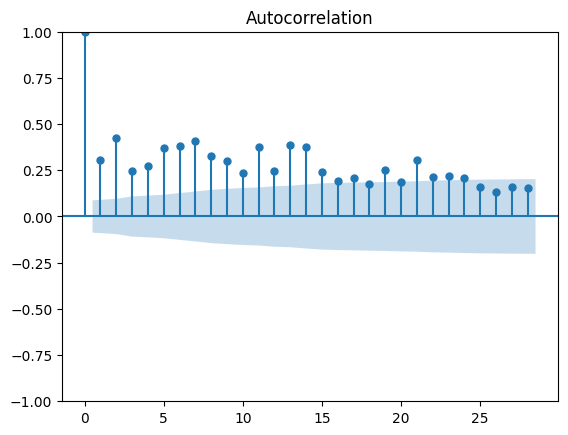

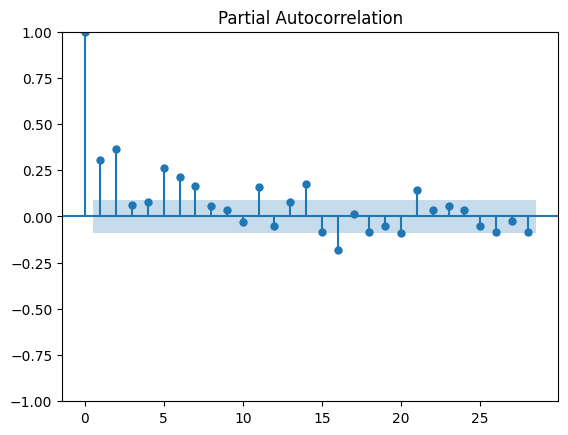

In [64]:
# Q2.2  Check PACF to spot the autoregressive sturcture.

# In GARCH model, it is the residual square series that should have auto-regressive structure. So you need to  generate the residual square time series and plot PACF.
# Using ACF and PACF for GARCH model selection is harder than  ARIMA, often not possible to find direct answer, so it requires a lot of trail and error. 
# Remember in GARCH(p,q) model, p is the order of the GARCH terms (lagged variance) and q is the order of the ARCH terms(lagged residual square).
# Find cutoffs in PACF, for the ARCH(q) order, use the same or less number as p.
#  p and q value is usually  set as 1 or 2 for GARCH model to sufficiently capture the volitility clustering.


plot_acf(df['values']**2)
plot_pacf(df['values']**2)

# We can see that there is a cutoff in PACF after lag 2 so we set q =2, p=1 or (2,2) for trail.

In [65]:
# Q2.3 Do a train-test split and fit the train data using GARCH model.
# Fit the GARCH model using model = arch_model (data, p=x, q=x), altough it is called 'arch_model' it is actually garch.
# **Some materials have the opposite difinition of p and q as our's, including the arch_model package. 
# **So in arch_model package, p is the order for arch (lagged residual square), and q is for GARCH (lagged variacne) , we need to swich it for our (p,q)
# **I know it is confusing, check the documentation for details: https://arch.readthedocs.io/en/latest/univariate/introduction.html

residuals =df['values']
vol=df['volatility']
trainsize = int(len (residuals)*0.9)
train, test = residuals[:trainsize], residuals[trainsize+1:]
model = arch_model(train, p=2, q=1)
garch_result = model.fit(disp='off')
garch_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 values   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1111.26
Distribution:                  Normal   AIC:                           2232.51
Method:            Maximum Likelihood   BIC:                           2253.07
                                        No. Observations:                  451
Date:                Wed, Mar 06 2024   Df Residuals:                      450
Time:                        23:01:05   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0263      0.110      0.238      0.812 [ -0.190,  0.243]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2970      0.149      1.996  4.597e-02  [5.308e-03,  0.589]
alpha[1]       0.1653  6.879e-02      2.403  1.626e-02  [3.047e-02,  0.300]
alpha[2]       0.0750  8.196e-02      0.916      0.360 [-8.559e-02,  0.236]
beta[1]        0.7439  5.555e-02     13.392  6.699e-41    [  0.635,  0.853]
===========================================================================

Covariance estimator: robust
"""

Text(0.5, 1.0, 'Simulated Series and GARCH Volatility')

<Figure size 1200x600 with 0 Axes>

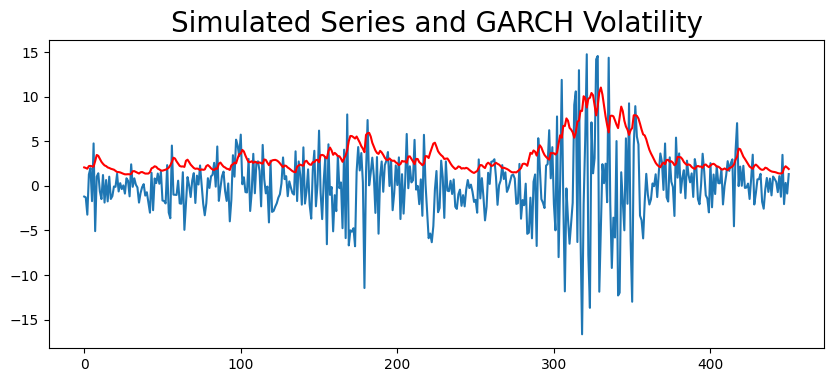

In [66]:
# Q2.4  Plot the training dataset and the predicted garch volitality.
# You can Get the conditional volatility (standard deviation) from the GARCH model using model.fit().conditional_volatility

garch_volatility = garch_result.conditional_volatility

# Plotting
plt.figure(figsize=(12, 6))

plt.figure(figsize=(10,4))
plt.plot(train)
plt.plot(garch_volatility, color='red')
plt.title('Simulated Series and GARCH Volatility', fontsize=20)

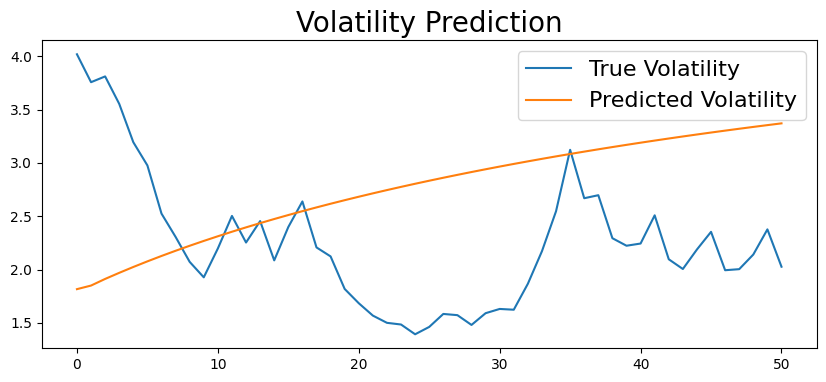

In [67]:
#Q 2.5 Use the Garch model to predict future volatility use model_fit.forecast(horizon= xx)
# model_fit.forecast(horizon= xx) will get you prediction of the series, for volatility prediction, use model_fit.forecast().variance.values[]
# Plot the true volatility (from original df) and compare it with the prediction.

testsize=len(series)-trainsize
predictions = garch_result.forecast(horizon=testsize)

plt.figure(figsize=(10,4))
true, = plt.plot(vols[-testsize:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

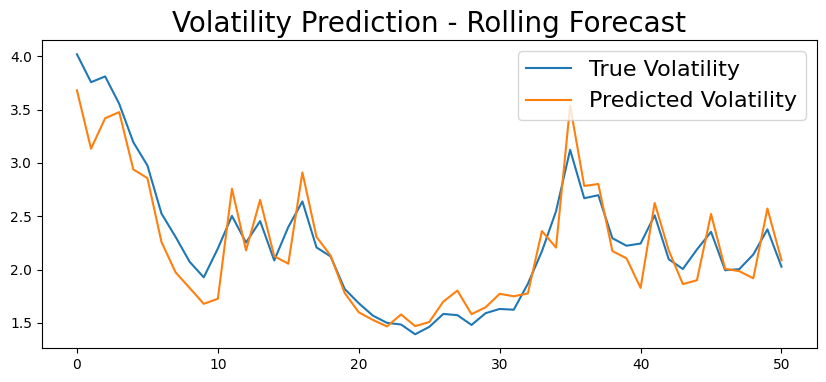

In [68]:
# Q 2.6 As can be seen from the above plot, the predicution drift off of real value after few steps. 
# Try to develop a rolling prediction function that uses all previous values as training set and predict 1 step by 1 step.

rolling_predictions = []
for i in range(testsize):
    train = series[:-(testsize-i)]
    model = arch_model(train, p=2, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))


plt.figure(figsize=(10,4))
true, = plt.plot(vols[-testsize:])

preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# 3 Bonus Quesion , ARIMA + GARCH
Use the ARIMA data from the previous lab to do an ARIMA+GARCH prediction, in which ARIMA is modeling the mean(value) of the series and GARCH is modelling the volitility. If you don't have the data, you can use the 'ARMA_complex.csv' from BB.

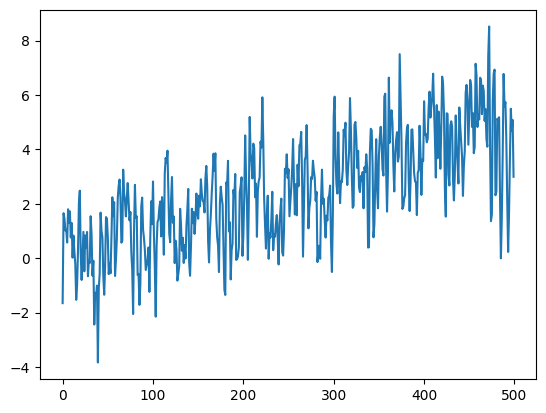

In [25]:
# Q 3.1 Load the simulated time series and predict the mean using ARIMA model.
df=pd.read_csv('ARMA_complex.csv')
plt.plot(df)

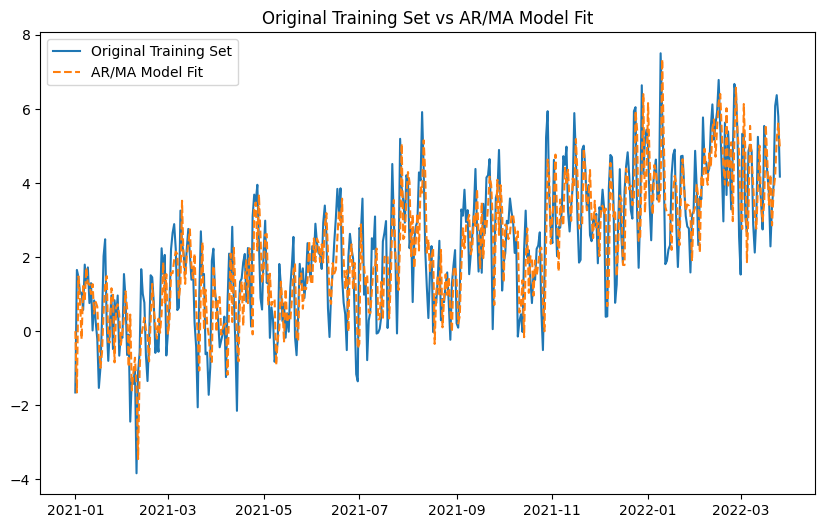

                               SARIMAX Results                                
Dep. Variable:                   ARMA   No. Observations:                  450
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -715.256
Date:                Wed, 06 Mar 2024   AIC                           1438.511
Time:                        22:28:32   BIC                           1454.939
Sample:                    01-01-2021   HQIC                          1444.987
                         - 03-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1486      0.048     -3.122      0.002      -0.242      -0.055
ar.L2         -0.2328      0.042     -5.583      0.000      -0.315      -0.151
ar.L3         -0.4068      0.045     -9.070      0.0

In [26]:
# we can use code piece from previous lab directly (skipping the ADFT, differencing check and ARMA model selection process for simplicity)

from statsmodels.tsa.arima.model import ARIMA


#Convert df index into a fake datetime index for futrue modeling convinience 

dates = pd.date_range(start='2021-01-01', periods=len(df), freq='D')  # Daily frequency, adjust as needed
df.index = dates

# Divide the data into 1:1 train and test sets
train_size = (int)(0.9 * df.shape[0])

#Breaking data set into test and training
df_train = pd.DataFrame(df[0:train_size])
df_test = pd.DataFrame(df[train_size:df.shape[0]])


# Fit an AR/ MA model on the training data
# Note the parameter for ARIMA orders are:  (p,d,q), so order=(0,0,1) specifies an MA(1) model with no differencing
arma_model = ARIMA(df_train, order=(3, 1, 0))
arma_result = arma_model.fit()

# Plot the original training set and the model fit
plt.figure(figsize=(10, 6))
plt.plot(df_train.index, df_train, label='Original Training Set')
plt.plot(df_train.index, arma_result.fittedvalues, label='AR/MA Model Fit', linestyle='--')
plt.title('Original Training Set vs AR/MA Model Fit')
plt.legend()
plt.show()
print(arma_result.summary())


# You might need to do some optimization to get a better result, but current result looks OK.

Q 3.2  There are two ways to model the volatility of time series. Sometimes you want to model the volatility of the time series directly (for example if you are studying the return of a stock), sometimes you want to model the volatility of the residual from a modelled mean (e_t = y_t - y_predicted_t). These approaches are case dependednt, modeling original series volatility is appropriate when the variability itself is the main focus or when the chosen model for the mean doesn't capture the volatility structure.
Modeling residual volatilith is often used when heteroscedasticity is present, meaning the variance of the series is not constant
  In this practice, if your model is good enough and the residual of mean is homoskedasti (for example the data supplied in BB is generated by ARIMA simulation, so you should be able to model it well)c, you can not model the volatility of the residual 



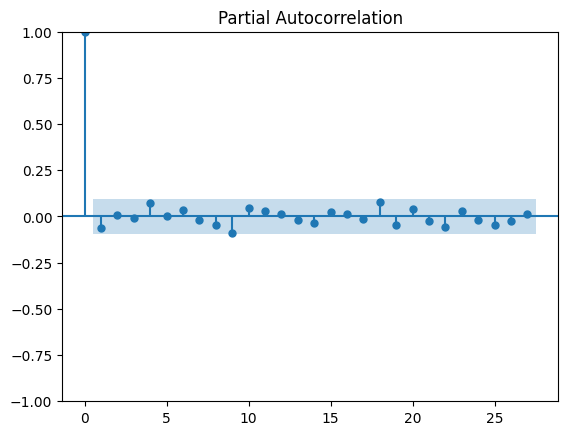

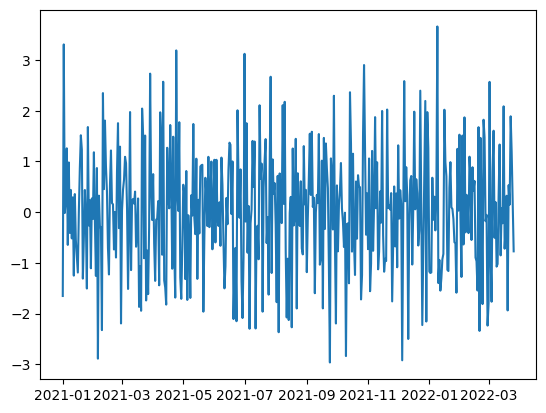

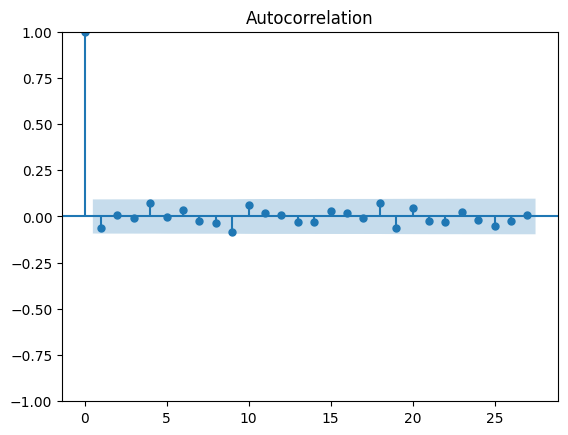

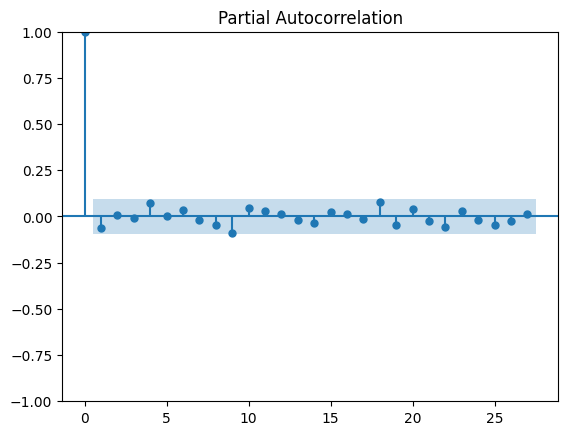

In [28]:
# Q 3.3 
# Get the residuals of the ARIMA prediction by arma_result.resid, plot it out and have a look.

#You can see that the residual does not have significant volatility clusetering and the ACF and PACF does not show significant sturecture.
# So no need to model the residual's volatility

residuals = arma_result.resid
plt.plot(residuals)

plot_acf(residuals**2)
plot_pacf(residuals**2)


In [46]:
# Q3.4 Fit a GARCH model to the original time series in df 

garch_model = arch_model(df_train, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

# Output the summary of the GARCH model fit
print(garch_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   ARMA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -891.749
Distribution:                  Normal   AIC:                           1791.50
Method:            Maximum Likelihood   BIC:                           1807.93
                                        No. Observations:                  450
Date:                Wed, Mar 06 2024   Df Residuals:                      449
Time:                        22:54:42   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             2.1287      0.148     14.392  5.794e-47 [  1.839,  2.41

In [49]:
# Q3.5 Forecast future mean values with ARIMA and forecast future volatility with GARCH  for 10 period.
# Use +- 1.96 sigma(forcasted) as a 95% confident inteval of the mean prediction, i.e. forcasted_mean+-1.9*forecasted_sigma as upper/lower bound
# This 'inteval' is not scientifically rigid, only for illustrative purpose. 

n_periods = 10  # Number of periods to forecast
forecast_arima = arma_result.forecast(steps=n_periods)

# Forecast future volatility with GARCH
forecast_garch = garch_result.forecast(horizon=n_periods)


# Assuming forecast_arima and forecast_garch are the mean and variance forecasts
mean_forecast = forecast_arima
variance_forecast = forecast_garch.variance.iloc[-1].values  # Last row for future variance
std_dev_forecast = np.sqrt(variance_forecast)

# Construct 95% prediction intervals
lower_bound = mean_forecast - 1.96 * std_dev_forecast
upper_bound = mean_forecast + 1.96 * std_dev_forecast





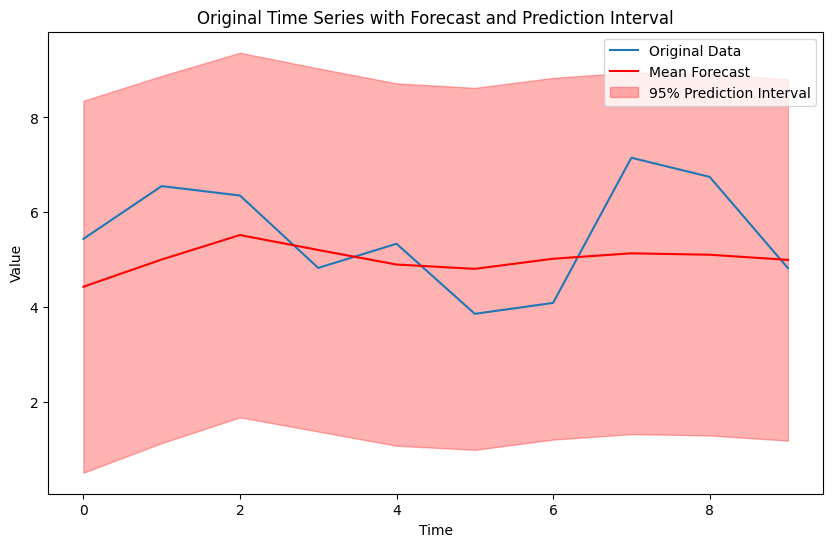

In [50]:
# Plot out the original time series (test dataset) , the ARIMA forecasted mean, and the GARCH forcasted 95% confidence inteval.

plt.figure(figsize=(10, 6))

future_periods = np.arange( n_periods)

# Original Time Series
plt.plot(future_periods, df_test[:n_periods], label='Original Data')

# Mean Forecast
plt.plot(future_periods, mean_forecast, color='red', label='Mean Forecast')

# Shaded Prediction Interval
plt.fill_between(future_periods, lower_bound, upper_bound, color='red', alpha=0.3, label='95% Prediction Interval')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original Time Series with Forecast and Prediction Interval')
plt.legend()
plt.show()